In [1]:
import numpy as np
import pandas as pd
import umap
import umap.plot
import xarray
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/vol/data/ouologuems/.local/lib/python3.10/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


# Explore and Combine Embeddings

In [2]:
embeddings = pd.read_pickle('/vol/data/ouologuems/systems_genetics/data/datasets/phase3_top10/embeddings_complete.pickle') 
len(embeddings), embeddings[0][1].size # list with (sampleID, embeddings, ground_truth_logprobs)

(10060, 256)

## 0. Visualize uncombined embeddings

In [3]:
sample_id = []
gene_id = []
embedding = []
for i in range(0, len(embeddings), 2):
    sid = embeddings[i][0].split(':')[1]
    gid = embeddings[i][0].split(':')[2]
    sample_id.append(sid)
    sample_id.append(sid)
    gene_id.append(gid)
    gene_id.append(gid)
    embedding.append(embeddings[i][1])
    embedding.append(embeddings[i+1][1])
df = pd.DataFrame({"sample_id": sample_id, "gene_id": gene_id, "embedding": embedding})
df.head()


,sample_id,gene_id,embedding
0,NA20795,ENSG00000198502.5,"[0.017137265, -0.009090343, 0.0061443364, -0.0..."
1,NA20795,ENSG00000198502.5,"[0.0036266677, 0.004730346, 0.011927858, -0.01..."
2,HG00260,ENSG00000214425.1,"[0.05563126, 0.00049458974, -0.0046671517, -0...."
3,HG00260,ENSG00000214425.1,"[-0.021061758, 0.023629636, -0.060864642, 0.04..."
4,HG01632,ENSG00000176681.9,"[-0.051695395, 0.023533892, -0.04169209, 0.067..."


In [4]:
df.gene_id.unique() # 10 genes 

array(['ENSG00000198502.5', 'ENSG00000214425.1', 'ENSG00000176681.9',
       'ENSG00000238083.3', 'ENSG00000229450.2', 'ENSG00000196735.6',
       'ENSG00000179344.11', 'ENSG00000237541.3', 'ENSG00000196126.6',
       'ENSG00000232629.4'], dtype=object)

Plot UMAP 

In [5]:
embs = np.array(df["embedding"].values.tolist())

<Axes: >

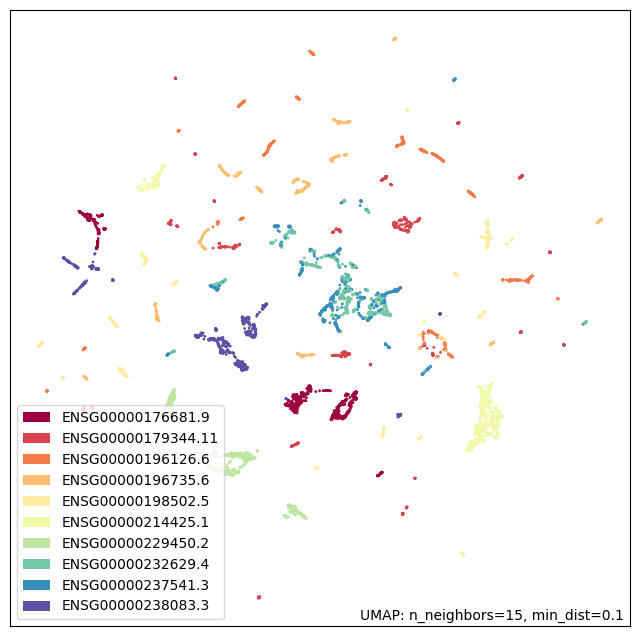

In [6]:
mapper = umap.UMAP().fit(X=xarray.DataArray(embs))
umap.plot.points(mapper, labels=df.gene_id)

Plot PCA

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit(embs).transform(embs)

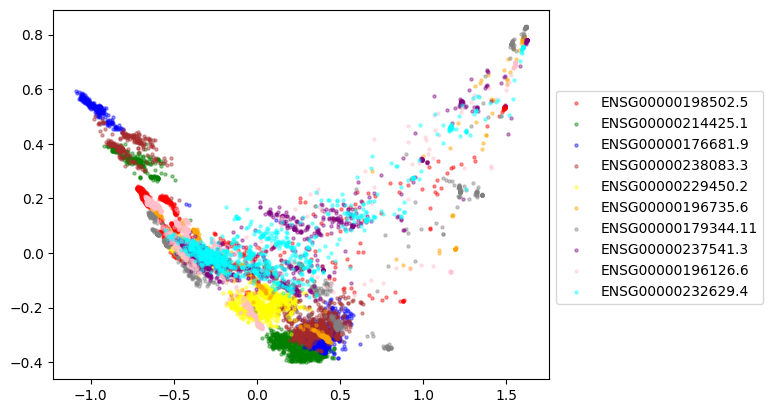

In [8]:
group = df.gene_id
cdict = {'ENSG00000198502.5': "red", 'ENSG00000214425.1': "green", 'ENSG00000176681.9': "blue",
       'ENSG00000238083.3': "brown", 'ENSG00000229450.2': "yellow", 'ENSG00000196735.6': "orange",
       'ENSG00000179344.11': "grey", 'ENSG00000237541.3': "purple", 'ENSG00000196126.6': "pink",
       'ENSG00000232629.4': "aqua"}

fig, ax = plt.subplots()
for g in group.unique():
    ix = df.index[df['gene_id'] == g].tolist()
    ax.scatter(X_pca[ix, 0], X_pca[ix, 1], c = cdict[g], label = g, s = 5, alpha = 0.4)
ax.legend(bbox_to_anchor=(1, 0.8), loc="upper left")
plt.show()

## 1. Visualize mean of the embeddings

In [18]:
sample_id = []
gene_id = []
embedding = []
for i in range(0, len(embeddings), 2):
    sid = embeddings[i][0].split(':')[1]
    gid = embeddings[i][0].split(':')[2]
    sample_id.append(sid)
    gene_id.append(gid)
    combined_embedding = (embeddings[i][1] + embeddings[i+1][1])/2    # mean embedding
    embedding.append(combined_embedding)
df = pd.DataFrame({"sample_id": sample_id, "gene_id": gene_id, "embedding": embedding})
df.shape

(5030, 3)

<Axes: >

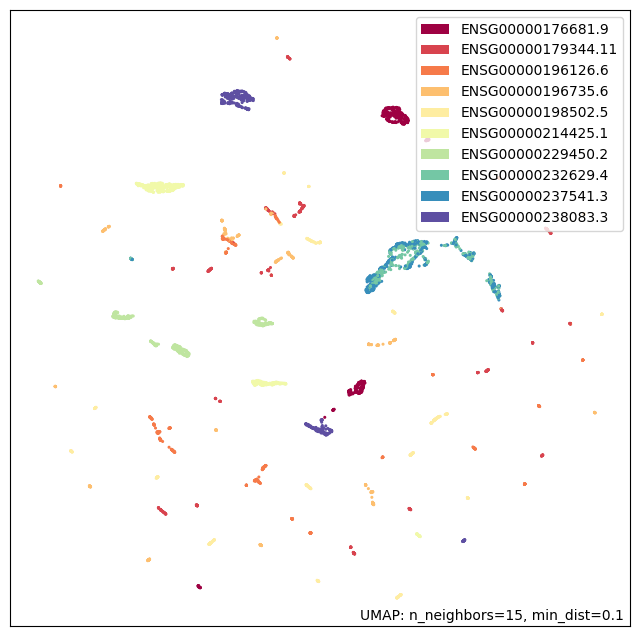

In [19]:
embs = np.array(df["embedding"].values.tolist())
mapper = umap.UMAP().fit(X=xarray.DataArray(embs))
umap.plot.points(mapper, labels=df.gene_id)

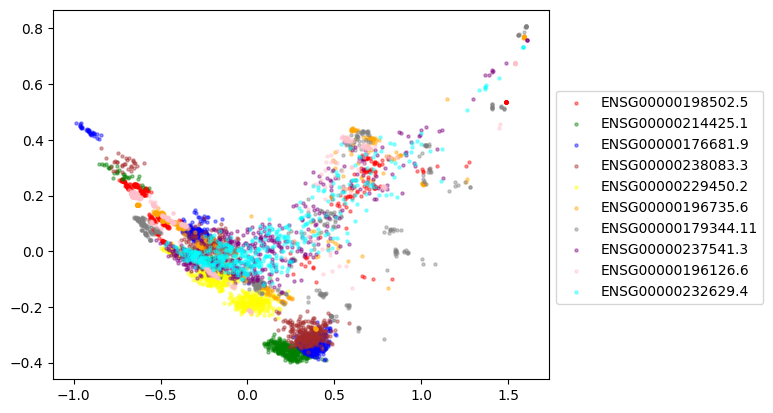

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit(embs).transform(embs)
group = df.gene_id
cdict = {'ENSG00000198502.5': "red", 'ENSG00000214425.1': "green", 'ENSG00000176681.9': "blue",
       'ENSG00000238083.3': "brown", 'ENSG00000229450.2': "yellow", 'ENSG00000196735.6': "orange",
       'ENSG00000179344.11': "grey", 'ENSG00000237541.3': "purple", 'ENSG00000196126.6': "pink",
       'ENSG00000232629.4': "aqua"}

fig, ax = plt.subplots()
for g in group.unique():
    ix = df.index[df['gene_id'] == g].tolist()
    ax.scatter(X_pca[ix, 0], X_pca[ix, 1], c = cdict[g], label = g, s = 5, alpha = 0.4)
ax.legend(bbox_to_anchor=(1, 0.8), loc="upper left")
plt.show()

## 2. Visualize sum of the embeddings

In [21]:
sample_id = []
gene_id = []
embedding = []
for i in range(0, len(embeddings), 2):
    sid = embeddings[i][0].split(':')[1]
    gid = embeddings[i][0].split(':')[2]
    sample_id.append(sid)
    gene_id.append(gid)
    combined_embedding = embeddings[i][1] + embeddings[i+1][1]    # sum embedding
    embedding.append(combined_embedding)
df = pd.DataFrame({"sample_id": sample_id, "gene_id": gene_id, "embedding": embedding})

<Axes: >

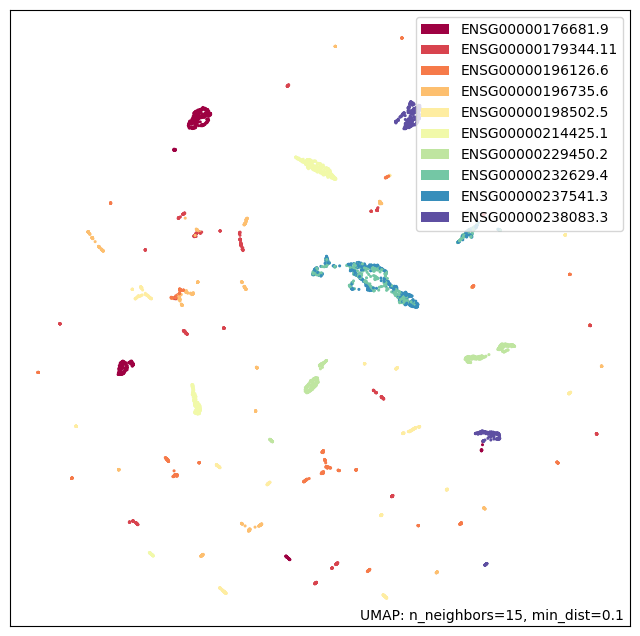

In [22]:
embs = np.array(df["embedding"].values.tolist())
mapper = umap.UMAP().fit(X=xarray.DataArray(embs))
umap.plot.points(mapper, labels=df.gene_id)

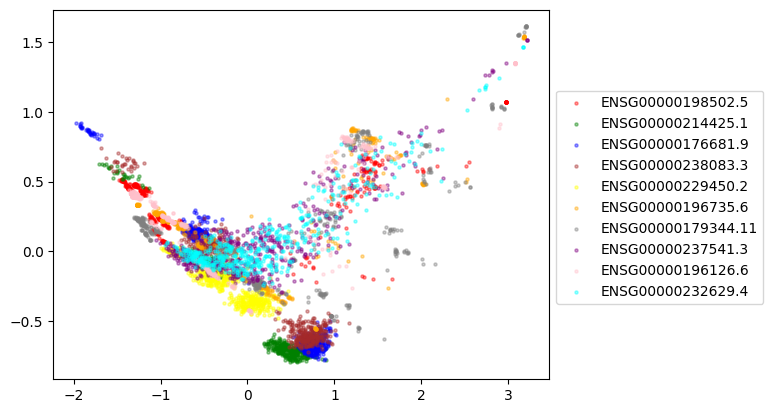

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit(embs).transform(embs)
group = df.gene_id
cdict = {'ENSG00000198502.5': "red", 'ENSG00000214425.1': "green", 'ENSG00000176681.9': "blue",
       'ENSG00000238083.3': "brown", 'ENSG00000229450.2': "yellow", 'ENSG00000196735.6': "orange",
       'ENSG00000179344.11': "grey", 'ENSG00000237541.3': "purple", 'ENSG00000196126.6': "pink",
       'ENSG00000232629.4': "aqua"}

fig, ax = plt.subplots()
for g in group.unique():
    ix = df.index[df['gene_id'] == g].tolist()
    ax.scatter(X_pca[ix, 0], X_pca[ix, 1], c = cdict[g], label = g, s = 5, alpha = 0.4)
ax.legend(bbox_to_anchor=(1, 0.8), loc="upper left")
plt.show()

## 3. Visualize concatenation of the embeddings

In [15]:
sample_id = []
gene_id = []
embedding = []
for i in range(0, len(embeddings), 2):
    sid = embeddings[i][0].split(':')[1]
    gid = embeddings[i][0].split(':')[2]
    sample_id.append(sid)
    gene_id.append(gid)
    combined_embedding = np.concatenate([embeddings[i][1], embeddings[i+1][1]]) # concatenate 2 embeddings.
    embedding.append(combined_embedding)
df = pd.DataFrame({"sample_id": sample_id, "gene_id": gene_id, "embedding": embedding})

<Axes: >

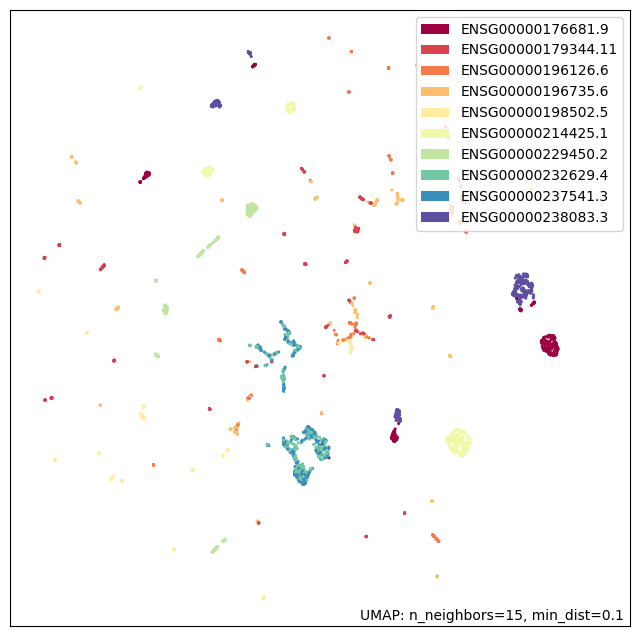

In [16]:
embs = np.array(df["embedding"].values.tolist())
mapper = umap.UMAP().fit(X=xarray.DataArray(embs))
umap.plot.points(mapper, labels=df.gene_id)

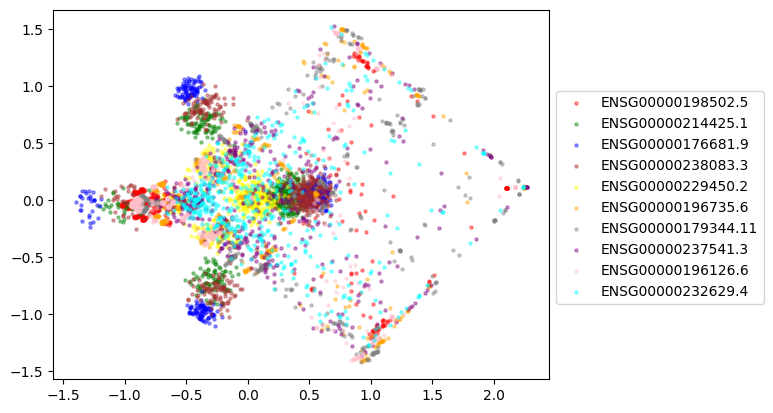

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit(embs).transform(embs)
group = df.gene_id
cdict = {'ENSG00000198502.5': "red", 'ENSG00000214425.1': "green", 'ENSG00000176681.9': "blue",
       'ENSG00000238083.3': "brown", 'ENSG00000229450.2': "yellow", 'ENSG00000196735.6': "orange",
       'ENSG00000179344.11': "grey", 'ENSG00000237541.3': "purple", 'ENSG00000196126.6': "pink",
       'ENSG00000232629.4': "aqua"}

fig, ax = plt.subplots()
for g in group.unique():
    ix = df.index[df['gene_id'] == g].tolist()
    ax.scatter(X_pca[ix, 0], X_pca[ix, 1], c = cdict[g], label = g, s = 5, alpha = 0.4)
ax.legend(bbox_to_anchor=(1, 0.8), loc="upper left")
plt.show()